### 粒子像のパターンマッチングで検出可能かの検証実験

- import library

In [1]:
import cv2

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

- read test image and particle image

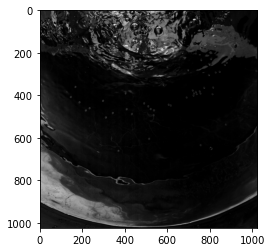

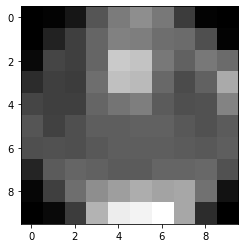

In [2]:
img = cv2.imread("../data/test.bmp", 1)
test_img = cv2.imread("../data/test.bmp", 0)
p_img = cv2.imread("../data/p.bmp", 0)
p_img1 = cv2.imread("../data/p1.bmp", 0)

# img show
plt.imshow(test_img, cmap="gray")
plt.show()

plt.imshow(p_img, cmap="gray")
plt.show()

- tmp pattern matching

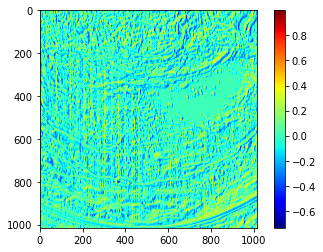

In [3]:
tmp_result = cv2.matchTemplate(test_img, p_img, cv2.TM_CCOEFF_NORMED)
tmp_result1 = cv2.matchTemplate(test_img, p_img1, cv2.TM_CCOEFF_NORMED)

# show result as heat map
tmp_result_hm = plt.imshow(tmp_result, cmap="jet")
plt.colorbar(tmp_result_hm)
plt.show()

- search particle

In [4]:
t = 0.7
t1 = 0.8

ys, xs = np.where(tmp_result >= t)
ys1, xs1 = np.where(tmp_result1 >= t1)
dst = img.copy()

for x, y in zip(xs, ys):
    cv2.rectangle(
        dst,
        (x, y),
        (x + p_img.shape[1], y + p_img.shape[0]),
        color=(0, 0, 255),
        thickness=1,
    )

for x, y in zip(xs1, ys1):
    cv2.rectangle(
        dst,
        (x, y),
        (x + p_img.shape[1], y + p_img.shape[0]),
        color=(0, 0, 255),
        thickness=1,
    )

- save result as img

In [5]:
cv2.imwrite("../data/tmp_result.bmp", dst)

True